# <center>Реферат - 2</center>
## <center>Состоятельность критерия на примере критерия хи-квадрат для проверки гипотезы согласия с видом распределения</center>
### <center>Мандрикова Анастасия</center>

Рассмотрим критерий Пирсона для проверки гипотезы согласия эмпирического распределения с теоретическим. Сформулируем нулевую гипотезу $H_{0}$: случайная величина $\xi$ имеет генеральную функцию распределения $F(x)$. Рассмотрим выборку наблюдений $(x_1, \dots, x_n)$. Cделаем из нее сгруппированную выборку $(n_1, \dots, n_r)$, таким образом $\sum \limits_{i=1}^{r}n_i = n$ и $n_i$ — количество наблюдений, попавших в интервал $S_i$. Теперь нулевую гипотезу можем рассматривать как равенство вероятностей $p_{i}$, отвечающих выборке $x_1, x_2, \dots, x_n$, и $p_{i}^0$ — теоретических вероятностей попадания случайной величины в соответсвующий интервал $S_i$:
$$H_{0}: p_{i} = p_{i}^{0}.$$ Здесь конечно же выполнено:
$$p_{i}^0 = P\left\lbrace \xi \in S_{i} \right\rbrace > 0,\qquad \sum_{i=1}^{r}p_{i}^0 = 1.$$
Cтатистика критерия при справедливости нулевой гипотезы
$$\chi ^{2} = \sum _{i=1}^{r}{\frac {\left(n_{i}-np_{i}^0\right)^{2}}{np_{i}^0}} \xrightarrow[n \rightarrow \infty]{d}  \chi^{2}(r-1).$$
Это распределение статистика имеет в случае, когда параметры модели заданы. Если же параметры не известны, можно их оценить по выборке. Если оценки задаются по методу максимального правдоподобия, то статистика $$\chi ^{2} = \sum _{i=1}^{r}{\frac {\left(n_{i}-np_{i}^0(\hat{\theta})\right)^{2}}{np_{i}^0(\hat{\theta})}} \xrightarrow[n \rightarrow \infty]{d}  \chi^{2}(r-1-k), $$
где $k$ - количество параметров.

Вероятность ошибки первого рода $\alpha_{\text{I}} = P_{H_0}(\text{отклонить } H_0) = \alpha$.

В качестчве альтернативной гипотезы $H_1$ можно рассматривать любое предположение о законе распределения $\xi$, которое не пересекается с гипотезой $H_0$. Например, $\xi$ имеет тот же закон распределения, что и в $H_0$, но с другими параметрами или $\xi$ имеет другой закон распределения.

Вероятность ошибки второго рода $\alpha_{\text{II}} = P_{H_1}(\text{не отвергнуть } H_0) = \alpha_{\text{II}}(n, \alpha, H_1)$.

Мощность критерия, против альтернативы $\beta = 1-\alpha_{\text{II}}$. Если $\beta \underset{n \rightarrow \infty}{\rightarrow} 1$, то критерий называется состоятельным против данной альтернативы.

Известно, что критерий Хи-квадрат Пирсона состоятелен против любой альтернативы. Чтобы проверить это, сначала убедимся в применимости критерия.

In [1]:
library(MASS)
Pearson <- function(X, estim = FALSE, H0 = "normal"){
  n_i <- hist(X, plot = FALSE)$counts
  breaks <- hist(X, plot = FALSE)$breaks
  # будем группировать выборку так, чтобы в один интервал попадало хотябы 5 наблюдений
  while (sum(n_i < 5) > 0) {
    nums <- which(n_i < 5)
    pos <- nums[length(nums)]
    if (pos == 1){
      n_i[pos+1] <- n_i[pos] + n_i[pos+1]
      n_i <- n_i[-1]
      breaks <- breaks[-2]
    }else{
      n_i[pos-1] <- n_i[pos] + n_i[pos-1]
      n_i <- n_i[-pos]
      breaks <- breaks[-pos]
    }
  }
  if (H0 == "normal"){
      breaks[1] <- -Inf
      breaks[length(breaks)] <- Inf
      if (estim) {
          omp <- fitdistr(X, "normal")
          p_i <- pnorm(breaks[-1], mean = omp$estimate['mean'], sd = omp$estimate['sd']) - 
          pnorm(breaks[-length(breaks)], mean = omp$estimate['mean'], sd = omp$estimate['sd'])
          df <- length(n_i)-1-2
      }
      else{
          p_i <- pnorm(breaks[-1], mean = 0, sd = 1) - pnorm(breaks[-length(breaks)], mean = 0, sd = 1)
          df <- length(n_i)-1
      }
  }
  if (H0 == "gamma"){
      breaks[1] <- 0
      breaks[length(breaks)] <- Inf
      omp <- fitdistr(X, "gamma")
      p_i <- pgamma(breaks[-1], shape = omp$estimate['shape'], rate = omp$estimate['rate']) - 
      pgamma(breaks[-length(breaks)], shape = omp$estimate['shape'], rate = omp$estimate['rate'])
      df <- length(n_i)-1-2
  }
  N <- sum(n_i)
  t <- sum((n_i - p_i*N)^2/(N*p_i))
  return(1-pchisq(q = t, df = df))
}

Warning message:
"package 'MASS' was built under R version 3.6.3"

In [2]:
p_gener <- function(n, R, alpha=0.05, beta = TRUE, H1 = "norm", mean = 0, sd = 1){
  p <- sapply(1:R, function(i){
    if (beta){
       if (H1 == "norm"){samp <- rnorm(n, mean, sd)}
       samp <- rgamma(n, shape = 2, scale = 1/sqrt(2))
       samp <- samp - mean(samp)
    }
    else {samp <- rnorm(n, 0, 1)}
    Pearson(samp)
  })
  sum(p < alpha)/R
}

Сформулируем нулевую гипотезу $H_0: \xi \sim N(0, 1)$. И оценим вероятность ошибки первого рода.

In [3]:
alpha <- seq(from = 0, to = 1, length.out = 100)

In [4]:
alpha_1 <- sapply(alpha, function(a){p_gener(200, 2000, a, beta = F)})

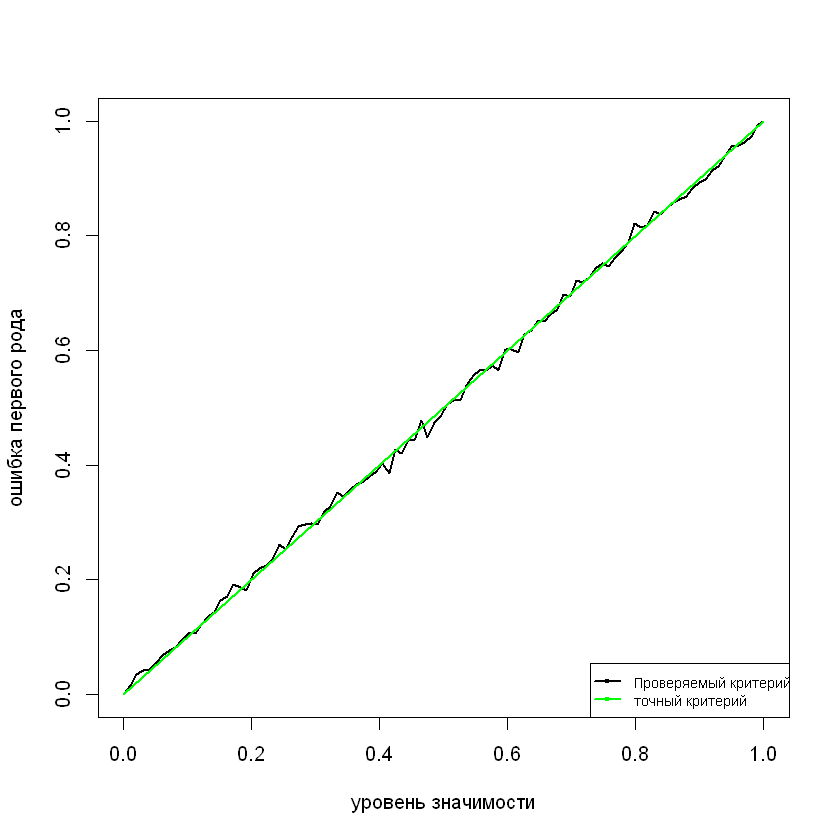

In [5]:
plot(alpha, alpha_1, type = "l", xlab = "уровень значимости", ylab = "ошибка первого рода", lwd = 2)
lines(c(0:1), c(0,1) , type = "l", col = "green", lwd = 2)
legend("bottomright", c("Проверяемый критерий", "точный критерий"), 
       col = c("black", "green"), cex=0.7, pch=20, lwd = 2)

Получили, что $\alpha_{\text{I}} \approx \alpha$ (при $\alpha_{\text{I}} = \alpha$ критерий точный), значит критерий применим.

Вычислим мощность критерия против $H_1: \xi \sim N(3, 1)$ и $H_1: \xi \text{ подчиняется гамма распределению}$. Для второй альтернативы при моделировании будем смещать выборку из гамма распределения на матожидание, чтобы превратить его в ноль и сделать более похожим на стандартное нормальное. Параметры подобраны так, что бы стандартное отклонение равнялось $1$.

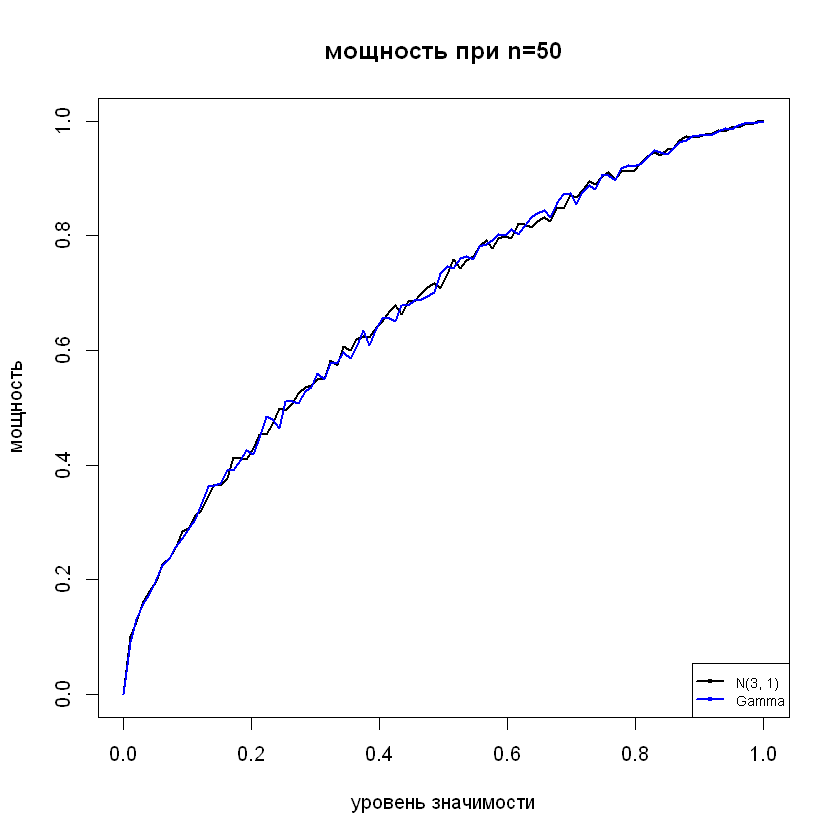

In [6]:
beta_n <- sapply(alpha, function(a){p_gener(50, 2000, a, H1 = "norm", mean = 3, sd = 1)})
beta_g <- sapply(alpha, function(a){p_gener(50, 2000, a, beta = TRUE, H1 = "gamma")})
plot(alpha, beta_n, type = "l", xlab = "уровень значимости", ylab = "мощность", lwd = 2, main = "мощность при n=50")
lines(alpha, beta_g, lwd = 2, col = "blue")
legend("bottomright", c("N(3, 1)", "Gamma"), 
       col = c("black", "blue"), cex=0.7, pch=20, lwd = 2)

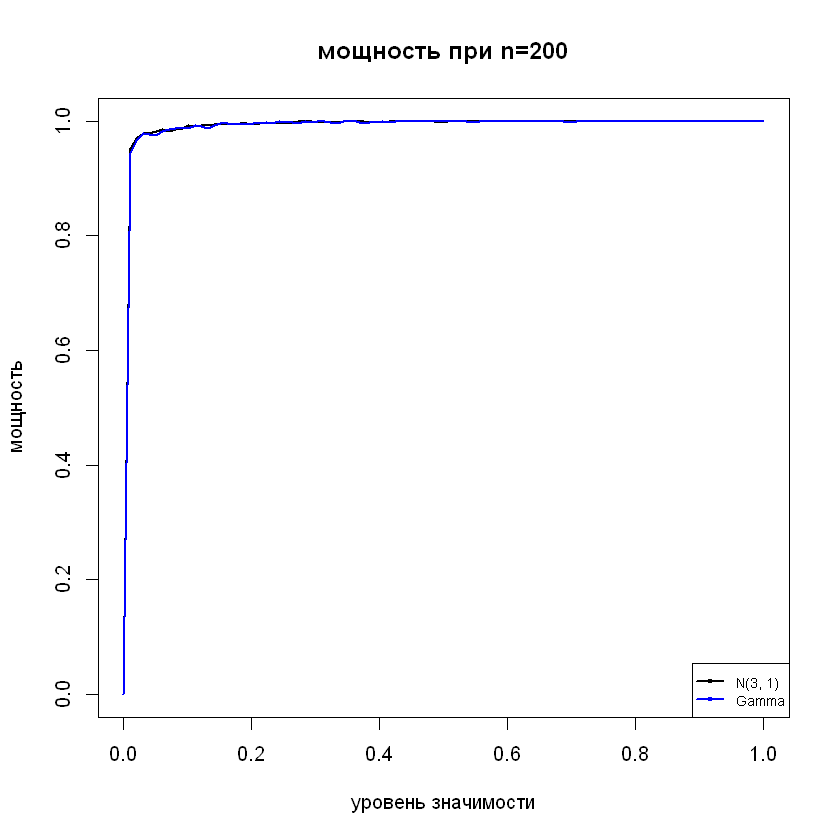

In [7]:
beta_n <- sapply(alpha, function(a){p_gener(200, 2000, a, H1 = "norm", mean = 3, sd = 1)})
beta_g <- sapply(alpha, function(a){p_gener(200, 2000, a, beta = TRUE, H1 = "gamma")})
plot(alpha, beta_n, type = "l", xlab = "уровень значимости", ylab = "мощность", lwd = 2, main = "мощность при n=200")
lines(alpha, beta_g, lwd = 2, col = "blue")
legend("bottomright", c("N(3, 1)", "Gamma"), 
       col = c("black", "blue"), cex=0.7, pch=20, lwd = 2)

Критерий против разных альтернатив сопоставим по мощности. Причем, при увеличении объемов выборки мощность стремится к $1$.

### Применение критерия к реальным данным

In [8]:
X <- mtcars$hp
omp <- fitdistr(X, "gamma")

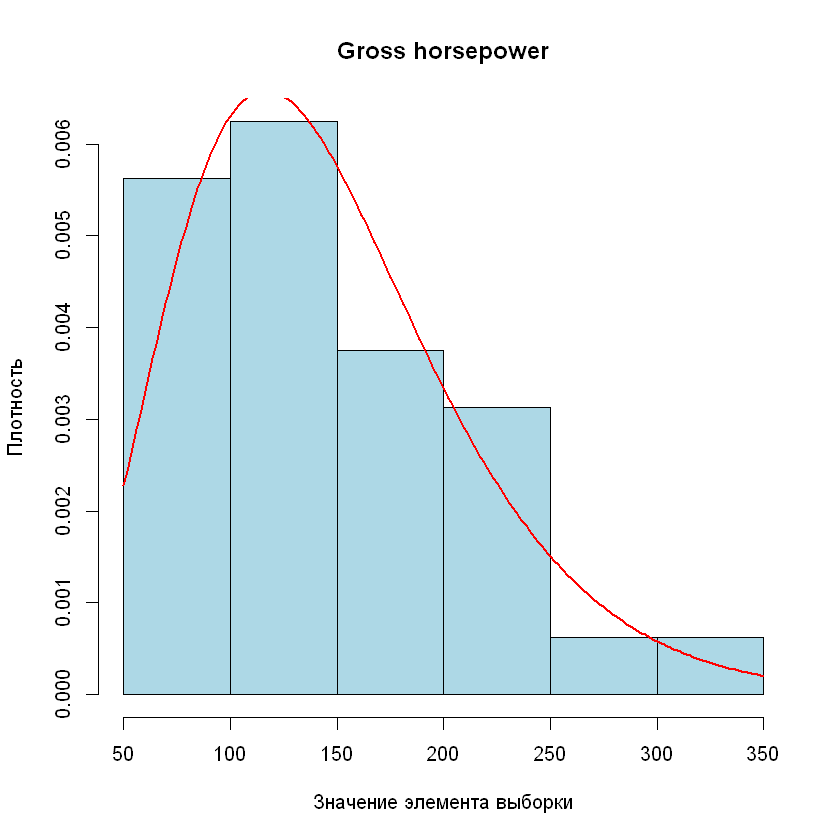

In [9]:
hist(X, freq = FALSE, col = "lightblue",
     xlab = "Значение элемента выборки", ylab = "Плотность", main = "Gross horsepower")
x <- seq(50, 350, length.out = 200)
y <- dgamma(x, shape = omp$estimate['shape'], rate = omp$estimate['rate'])
lines(x, y, lwd = 2, col = "red")

Поставим нулевую гипотезу $H_0: \xi \sim \Gamma()$. Вычислим $p.value$:

In [10]:
Pearson(X = X, estim = TRUE, H0 = "gamma")

[1] 0.5317035

Нулевая гипотеза не отвергается.